# Midterm Exam Part 2: Hands-on Coding Assignment

## Instructions

Type in your SUID in place of the zeros below and run the cell (click Ctrl + Enter):

In [1]:
suid <- 9999999

The block of code below creates a custom data set for you to analyze. Your dataset is different from every other student’s dataset. The goal of this part of the exam is to write code and comments that address the research questions described below. The quality of your comments is critical to your success on this exam! You will only be submitting R code and there are several important results that require an explanation in plain language. Pay close attention to the research questions described below when writing your code and comments.

Do not modify any of the code, just run it as is:

In [2]:
if (suid == 0) {cat("Please update your SUID (above) before running this code.")} else {cat(paste("Lyft/Uber Fare Comparison Study Number:",suid,"\n")); set.seed(suid); grp1id <- paste("Lyft",substr(as.hexmode(suid),1,2),sep="_"); grp2id <- paste("Uber",substr(as.hexmode(suid),1,2),sep="_"); ssize <- floor(runif(n=1,min=100,max=140)); driver <- 1:ssize; base <-round(rnorm(n=ssize,mean=25,sd=5), digits=2);lyft <- round(rowMeans(cbind(base, runif(ssize,min=15,max=35))),digits=2);if ((suid %% 2)==1) {uber <- round(rowMeans(cbind(base, runif(ssize,min=10,max=40))),digits=2) } else { uber <- round(rowMeans(cbind( base + rexp(n=ssize,rate=0.25), rnorm(n=ssize,mean=25,sd=5))),digits=2)}; testDF <- data.frame(driver,lyft,uber);cat(paste("Sample size for this study:",ssize)); t1 <- testDF[,3] + 0.25*rnorm(n=ssize, (mean(testDF[,3])),sd=5);t <-testDF[,2] + 1.1*rnorm(n=ssize,mean(testDF[,2]),sd=20); t[ t < 0] <- 0;t1[ t1 < 0] <- 0;testDF <- data.frame(driver,lyft,uber, t, t1);if ((suid %% 2)==1) {states <- c("New York", "Texas", "Texas", "Florida")}else {states <- c("California", "California","Texas", "Georgia") }; testDF$tmp1 <- sample(states, nrow(testDF), replace=TRUE); testDF$tmp2 <- testDF$tmp1;rm(states);names(testDF)[2]<-grp1id; names(testDF)[3]<-grp2id;names(testDF)[5]<-paste0(grp2id, "_distance");names(testDF)[4]<-paste0(grp1id, "_distance");names(testDF)[7]<-paste0(grp2id, "_state");names(testDF)[6]<-paste0(grp1id, "_state"); rm(base); rm(lyft); rm(uber); rm(ssize); rm(grp1id); rm(grp2id); rm(driver); rm(t); rm(t1)}


Lyft/Uber Fare Comparison Study Number: 9999999 
Sample size for this study: 116

## Your Assignment: rYdZ Analysis

The code you just ran generates a unique dataframe called **testDF**. You can explore it by running, e.g. head(testDF). Columns 2 & 3 which only have the names of Lyft and Uber in them designate the **fare** for each company:

In [3]:
head(testDF)

,driver,Lyft_98,Uber_98,Lyft_98_distance,Uber_98_distance,Lyft_98_state,Uber_98_state
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,1,20.65,30.10,18.016239,35.98682,Texas,Texas
2,2,24.26,26.22,53.412937,32.92212,Texas,Texas
3,3,30.41,27.10,3.095119,33.38243,Florida,Florida
4,4,32.56,28.55,43.065083,35.37287,Texas,Texas
5,5,26.60,26.39,84.342240,33.59921,Texas,Texas
6,6,27.17,18.76,55.093458,22.99346,Florida,Florida


There is an upstart in the ride-sharing market: The new start-up firm **rYdZ** (pronounced “rides”) is driver-owned and operated. In addition to providing safe rides at competitive prices, the mission of **rYdZ** is to provide a working wage to **rYdZ** drivers. But the leadership team at **rYdZ** believes there is a problem: the two giants in the industry, **Lyft** and **Uber**, are coordinating to set prices for rides that are artificially low. The team at **rYdZ** has produced a data set of more than 100 fares offered to drivers from **Lyft** and **Uber**. Your job is to analyze this data set and infer whether there is some sort of coordination between **Lyft** and **Uber** to set prices, as well as understand if either is pricing based on miles driven, or perhaps, based on geography.

## Data Set Description: 
Your data set contains **five variables**: The **ride number**, the **fare** (in dollars and cents) of a ride offered to a driver from Lyft, and the **distance** of that ride (in miles). There is also a **fare for a different ride** offered to a driver through Uber (and the **distance of that trip**). There are at least 100 observations (rows) in your dataset, and possibly more. Each observation was done at roughly the same time for Uber and Lyft (the data for the ride in a row was collected at roughly the same time).

## Research Questions (tasks to do):
1.	Describe the fares provided by Lyft and Uber (separately) using descriptive statistics:

In [3]:
#DO NOT RUN THESE:
#install.packages("tidyverse")
#install.packages("ggplot2")

#YOU ONLY NEED TO RUN THESE:
library(tidyverse)
library(ggplot2)

summary(testDF$Lyft_98)
summary(testDF$Uber_98)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14.80   21.38   24.89   24.78   27.23   32.60 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.52   21.86   25.25   24.84   28.07   34.29 

2.	Describe the shape of the distribution for Lyft fares. Do the same for Uber fares:

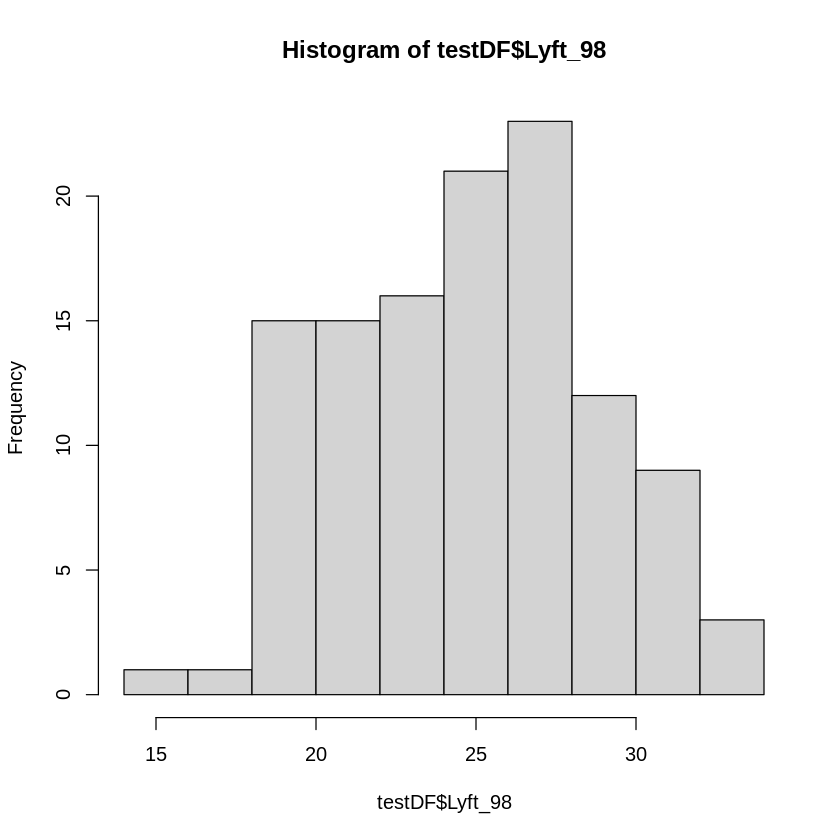

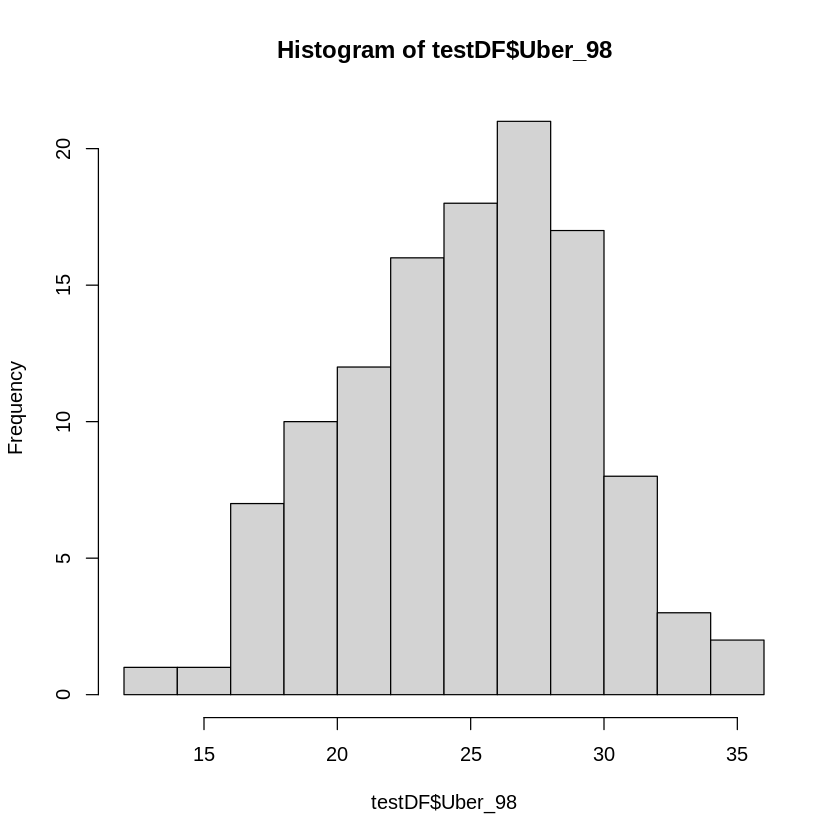

In [4]:
hist(testDF$Lyft_98)
hist(testDF$Uber_98)

3.	Based on the fares offered by both companies, on average, which company is more expensive, Lyft or Uber? By how much?

In [5]:
mean(testDF$Uber_98)-mean(testDF$Lyft_98)

[1] 0.06025862

4.	Create a new variable that represents the difference in fares between Uber and Lyft for each observation (i.e., each row):

In [6]:
testDF$fare_difference <- testDF$Uber_98 - testDF$Lyft_98

5. Describe the shape of the distribution for this new variable:

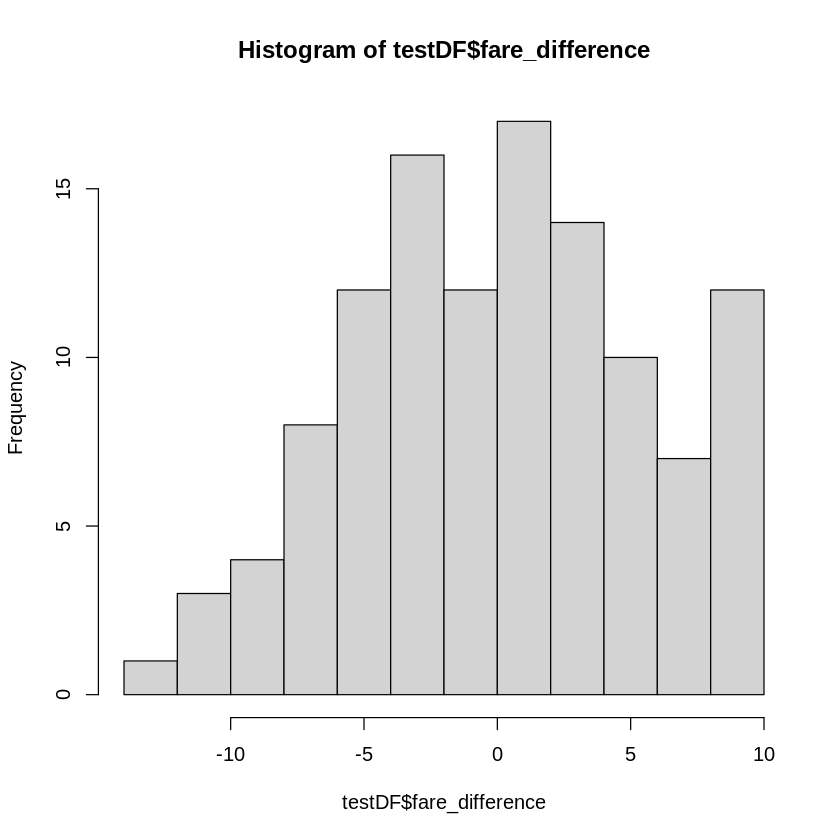

In [7]:
hist(testDF$fare_difference)

6.	Create an X-Y scatterplot of the Lyft and Uber fares (make sure to provide informative labels for each axis).  Does the scatterplot show an obvious pattern/relationship?

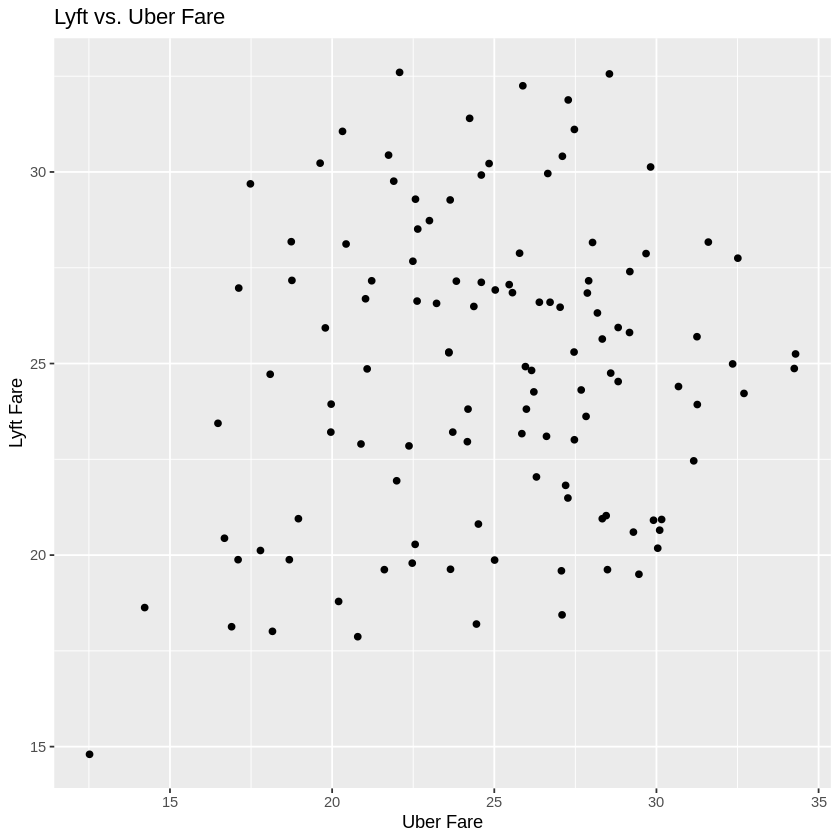

In [8]:
uber_lyft_scatter <- ggplot(data = testDF, aes(x = Uber_98, y = Lyft_98)) + geom_point()
uber_lyft_scatter <- uber_lyft_scatter + ggtitle("Lyft vs. Uber Fare") + xlab("Uber Fare") + ylab("Lyft Fare")
uber_lyft_scatter

7.	Generate a linear model trying to predict Lyft fares based on the distance of the trip. Interpret the coefficients of the statistically significant predictors in the model.

In [9]:
lyft_lm <- lm(data = testDF, Lyft_98 ~ Lyft_98_distance)
summary(lyft_lm)


Call:
lm(formula = Lyft_98 ~ Lyft_98_distance, data = testDF)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8526 -3.3414  0.3304  2.5517  8.0589 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      23.93688    0.98484  24.305   <2e-16 ***
Lyft_98_distance  0.01652    0.01803   0.916    0.361    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.904 on 114 degrees of freedom
Multiple R-squared:  0.00731,	Adjusted R-squared:  -0.001398 
F-statistic: 0.8395 on 1 and 114 DF,  p-value: 0.3615


8. Generate a similar model for the Uber trips. Interpret the coefficients of the statistically significant predictors in the model.  

In [10]:
uber_lm <- lm(data = testDF, Uber_98 ~ Uber_98_distance)
summary(uber_lm)


Call:
lm(formula = Uber_98 ~ Uber_98_distance, data = testDF)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.59182 -0.74392  0.03069  0.87313  2.57025 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -3.88947    0.69879  -5.566 1.75e-07 ***
Uber_98_distance  0.92330    0.02221  41.568  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.117 on 114 degrees of freedom
Multiple R-squared:  0.9381,	Adjusted R-squared:  0.9376 
F-statistic:  1728 on 1 and 114 DF,  p-value: < 2.2e-16


9.	Which model is better? Please explain your answer:

In [ ]:
#.........

10.	What would be your model’s prediction of the Lyft fare for a 2.39 mile trip? 

In [11]:
pred_lyft <- data.frame(Lyft_98_distance = 2.39)
predict(lyft_lm, pred_lyft)

1 
23.97636

11.	What would be your other model’s prediction of the Uber fare for a 2.39 mile trip? 

In [12]:
pred_uber <- data.frame(Uber_98_distance = 2.39)
predict(uber_lm, pred_uber)

1 
-1.682783

12.	Generate a map where each state is shaded according to the average fare for Uber. Make sure even states with no data are visible on your map:

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



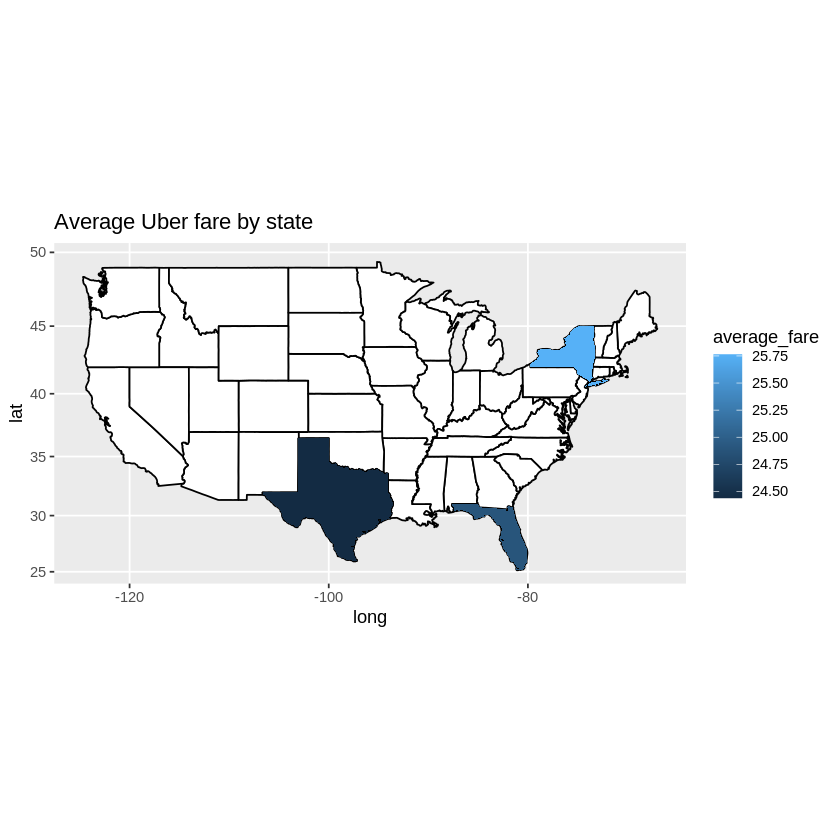

In [14]:
install.packages("ggmap")
library(ggmap)
install.packages("maps")
library(maps)
install.packages("mapproj")
library(mapproj)

testDF$Uber_98_state <- tolower(testDF$Uber_98_state)

us <- map_data("state")
us$name <- us$region
#us

#Aggregate average uber fare by state
state_uber_fare <- aggregate(testDF$Uber_98, by = list(testDF$Uber_98_state), FUN = mean)
state_uber_fare$name <- state_uber_fare$Group.1
state_uber_fare$average_fare <- state_uber_fare$x

Uber_fare_map <- ggplot(data = state_uber_fare, aes(map_id = name))
Uber_fare_map <- Uber_fare_map + geom_polygon(data = us, aes(x = long, y = lat, group = group), fill = "white", color = "black")
Uber_fare_map <- Uber_fare_map + geom_map(map = us, aes(fill = average_fare))
Uber_fare_map <- Uber_fare_map + expand_limits(x = us$long, y = us$lat) + coord_map() + ggtitle("Average Uber fare by state")
Uber_fare_map

13.	Include a comment indicating whether or not you think Lyft and Uber fares are related based only on your data analysis. If the distributions of Lyft fares and Uber fares look similar and the distribution of the differences variable is normal and the X-Y scatterplot shows a clear pattern or relationship, then they may be related, i.e. they may be coordinating prices.

In [ ]:
#.......